## ¿Qué construirás?

Un análisis sobre un conjunto de datos para su posterior modelado. Este proyecto se dividirá en 4 secciones:

*   Análisis Exploratorio
*   Limpieza de datos
*   Procesamiento de datos
*   Reducción de dimensiones

## Conjunto de datos para analizar.
Se tiene información de Lending Club, empresa estadounidense de préstamos con sede en San Francisco, California. En dicha compañía, los prestatarios pueden acceder fácilmente a préstamos con tasas de interés bajas.
El dataset contiene datos de todos los préstamos emitidos durante el periodo 2007-2015, con el estado actual del préstamo (actual, cancelado, completamente pagado) y la información de pago más reciente.

Las características adicionales incluyen puntajes de crédito, número de consultas financieras y cobros, entre otros.

Puedes descargar la información al hacer clic en el siguiente enlace:https://drive.google.com/file/d/1oxjXn7PkuqeSdQz5dOMXZOJfhJoBlX3T/view?usp=sharing

¡Comencemos!

In [ ]:
#Importa las librerías que vayas a usar para tu proyecto, no olvides importar pandas.
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  functools import reduce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install varclushi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 261 kB/s 


In [ ]:
from varclushi import VarClusHi

In [ ]:
#El primer paso es descargar el archivo, guardarlo en drive y finalmente leerlo con pd.read_csv.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Parte 1
Dado el _dataset_:

* Identifica el tipo de datos de cada variable y verifica la completitud.
* Determina las variables que son continuas, discretas y la variable objetivo.

> Puedes contar los valores dentro de una variable y utilizar las funciones que desees para cumplir estos objetivos; mientras más completo sea el EDA, mejor puntaje obtendrás.



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/1. DataScienci/proyectoModulo_2/dataset_Proyecto_M2.csv")

In [ ]:
#Identificar como se compone el DataFrame.
pd.options.display.max_columns = None #Muestra todas las columnas del DataFrame
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Veremos la cantidad de variables que cuenta el DataFrame, además de los tipo de datos de cada variable y la cantidad de no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
#Revisamos si hay valores duplicados
df.duplicated().value_counts()

False    887379
dtype: int64

In [ ]:
 #Verificamos estatus de los creditos, a la fecha (2015)
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
#Veremos el total monto en creditos prestado
total = (df['loan_amnt'].sum())
print(f'Se han asignado un total de ${total} en creditos, hasta el 2015')

Se han asignado un total de $13093511950.0 en creditos, hasta el 2015


In [ ]:
#Codigo que se utilizará para revisar cada variable y poder definir si es continua o discreta
df['cont_initial_list_status'].value_counts()

f    456848
w    430531
Name: cont_initial_list_status, dtype: int64

In [ ]:
#Categorizacion de las variable

def rename_cols(df,cols,prefix):
    new_feats=[prefix+col for col in cols]
    df=df.rename(columns=dict(zip(cols,new_feats)))
    return df


v_feats=['id', 'term', 'member_id', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
        'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 
        'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
         'mths_since_last_major_derog', 'policy_code', 'application_type', 'verification_status_joint', 'acc_now_delinq', 'open_acc_6m', 'open_il_6m',
         'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'open_rv_12m', 'open_rv_24m', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'initial_list_status']
c_feats=['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util',
         'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
         'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc_joint', 'dti_joint', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'il_util',
         'max_bal_bc', 'all_util', 'total_rev_hi_lim']
tgt=['loan_amnt']

df=rename_cols(df,v_feats,"disc_")
df=rename_cols(df,c_feats,"cont_")
df=rename_cols(df,tgt,"tgt_")

In [ ]:
#Comprobamos que todas las variables fueron renombradas
df.head(3)

,disc_id,disc_member_id,tgt_loan_amnt,cont_funded_amnt,cont_funded_amnt_inv,disc_term,cont_int_rate,cont_installment,disc_grade,disc_sub_grade,disc_emp_title,disc_emp_length,disc_home_ownership,cont_annual_inc,disc_verification_status,disc_issue_d,disc_loan_status,disc_pymnt_plan,disc_url,disc_desc,disc_purpose,disc_title,disc_zip_code,disc_addr_state,cont_dti,disc_delinq_2yrs,disc_earliest_cr_line,disc_inq_last_6mths,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_open_acc,disc_pub_rec,cont_revol_bal,cont_revol_util,disc_total_acc,disc_initial_list_status,cont_out_prncp,cont_out_prncp_inv,cont_total_pymnt,cont_total_pymnt_inv,cont_total_rec_prncp,cont_total_rec_int,cont_total_rec_late_fee,cont_recoveries,cont_collection_recovery_fee,disc_last_pymnt_d,cont_last_pymnt_amnt,disc_next_pymnt_d,disc_last_credit_pull_d,disc_collections_12_mths_ex_med,disc_mths_since_last_major_derog,disc_policy_code,disc_application_type,cont_annual_inc_joint,cont_dti_joint,disc_verification_status_joint,disc_acc_now_delinq,cont_tot_coll_amt,cont_tot_cur_bal,disc_open_acc_6m,disc_open_il_6m,disc_open_il_12m,disc_open_il_24m,disc_mths_since_rcnt_il,cont_total_bal_il,cont_il_util,disc_open_rv_12m,disc_open_rv_24m,cont_max_bal_bc,cont_all_util,cont_total_rev_hi_lim,disc_inq_fi,disc_total_cu_tl,disc_inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Revisamos las medidas de distribucion de la variable objetivo
df.filter(like="tgt_").describe()

,tgt_loan_amnt
count,887379.000000
mean,14755.264605
std,8435.455601
min,500.000000
25%,8000.000000
50%,13000.000000
75%,20000.000000
max,35000.000000


In [ ]:
#Filtramos los tipos de variables, para entender un poco mejor el DataFrame, para saber cuantas variables son Discretas, Continuas y la objetivo
print(f'Son {(df.filter(like="disc_").head()).shape[1]} variables discretas')
print(f'Son {(df.filter(like="cont_").head()).shape[1]} variables Continuas')
print(f'Son {(df.filter(like="tgt_").head()).shape[1]} variables Objetivo')

Son 45 variables discretas
Son 28 variables Continuas
Son 1 variables Objetivo


In [ ]:
#Verificamos la completitud de las variables
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,cont_dti_joint,886870,0.057360
1,cont_annual_inc_joint,886868,0.057585
2,disc_verification_status_joint,886868,0.057585
3,cont_il_util,868762,2.097976
4,disc_mths_since_rcnt_il,866569,2.345108
...,...,...,...
69,cont_total_pymnt_inv,0,100.000000
70,cont_total_rec_prncp,0,100.000000
71,cont_total_rec_int,0,100.000000
72,disc_pymnt_plan,0,100.000000


In [ ]:
#Completitud mayor al 80%
completitud[completitud['completitud'] > 80]

,columna,total,completitud
22,cont_tot_coll_amt,70276,92.080498
23,cont_tot_cur_bal,70276,92.080498
24,cont_total_rev_hi_lim,70276,92.080498
25,disc_emp_title,51462,94.200674
26,disc_emp_length,44825,94.948607
27,disc_last_pymnt_d,17659,98.009982
28,cont_revol_util,502,99.943429
29,disc_title,152,99.982871
30,disc_collections_12_mths_ex_med,145,99.983660
31,disc_last_credit_pull_d,53,99.994027


In [ ]:
#Revisar si hay datos atipicos, con el rango intercualtil
Q1 = df['tgt_loan_amnt'].quantile(0.25)
Q3 = df['tgt_loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
df['tgt_loan_amnt_outlier'] =  df['tgt_loan_amnt'].apply(lambda x: True if x < (Q1 - 1.5*IQR) or x > (Q3 +  1.5*IQR) else False)
df[df['tgt_loan_amnt_outlier'] == True].sort_values(by='tgt_loan_amnt')


8000.0 20000.0 12000.0


,disc_id,disc_member_id,tgt_loan_amnt,cont_funded_amnt,cont_funded_amnt_inv,disc_term,cont_int_rate,cont_installment,disc_grade,disc_sub_grade,disc_emp_title,disc_emp_length,disc_home_ownership,cont_annual_inc,disc_verification_status,disc_issue_d,disc_loan_status,disc_pymnt_plan,disc_url,disc_desc,disc_purpose,disc_title,disc_zip_code,disc_addr_state,cont_dti,disc_delinq_2yrs,disc_earliest_cr_line,disc_inq_last_6mths,disc_mths_since_last_delinq,disc_mths_since_last_record,disc_open_acc,disc_pub_rec,cont_revol_bal,cont_revol_util,disc_total_acc,disc_initial_list_status,cont_out_prncp,cont_out_prncp_inv,cont_total_pymnt,cont_total_pymnt_inv,cont_total_rec_prncp,cont_total_rec_int,cont_total_rec_late_fee,cont_recoveries,cont_collection_recovery_fee,disc_last_pymnt_d,cont_last_pymnt_amnt,disc_next_pymnt_d,disc_last_credit_pull_d,disc_collections_12_mths_ex_med,disc_mths_since_last_major_derog,disc_policy_code,disc_application_type,cont_annual_inc_joint,cont_dti_joint,disc_verification_status_joint,disc_acc_now_delinq,cont_tot_coll_amt,cont_tot_cur_bal,disc_open_acc_6m,disc_open_il_6m,disc_open_il_12m,disc_open_il_24m,disc_mths_since_rcnt_il,cont_total_bal_il,cont_il_util,disc_open_rv_12m,disc_open_rv_24m,cont_max_bal_bc,cont_all_util,cont_total_rev_hi_lim,disc_inq_fi,disc_total_cu_tl,disc_inq_last_12m,tgt_loan_amnt_outlier


In [ ]:
#Analisis de la asimetria y curtosis de la variable objetivo
print("Asimetría: %f" % df['tgt_loan_amnt'].skew())
print("Curtosis: %f" % df['tgt_loan_amnt'].kurt())

Asimetría: 0.681683
Curtosis: -0.256715


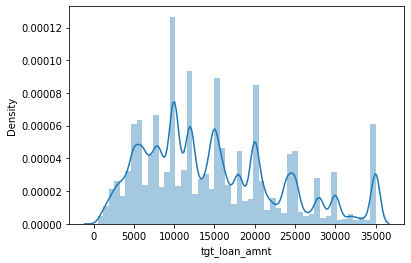

In [ ]:
#se comprueba en una grafica de distribucion
sns.distplot(df['tgt_loan_amnt']);

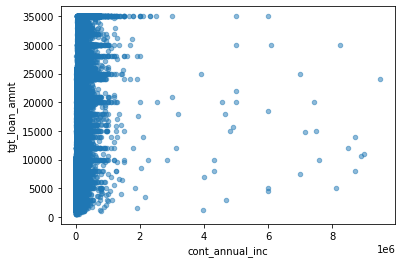

In [ ]:
#Relacion entre el Prestamo solicitado (tgt_loan_amnt) y los incresos anuales (cont_annual_inc) 
datos = pd.concat([df['tgt_loan_amnt'], df['cont_annual_inc']], axis=1)
datos.plot.scatter(x='cont_annual_inc', y='tgt_loan_amnt', alpha = 0.5);

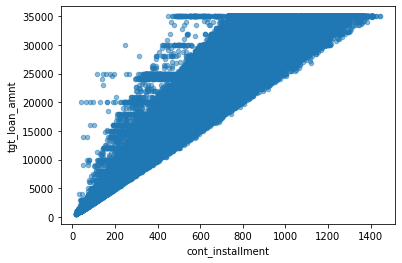

In [ ]:
#Relacion entre el Prestamo solicitado (tgt_loan_amnt) y las cuotas mensuales (cont_installment) 
datos = pd.concat([df['tgt_loan_amnt'], df['cont_installment']], axis=1)
datos.plot.scatter(x='cont_installment', y='tgt_loan_amnt', alpha = 0.5);

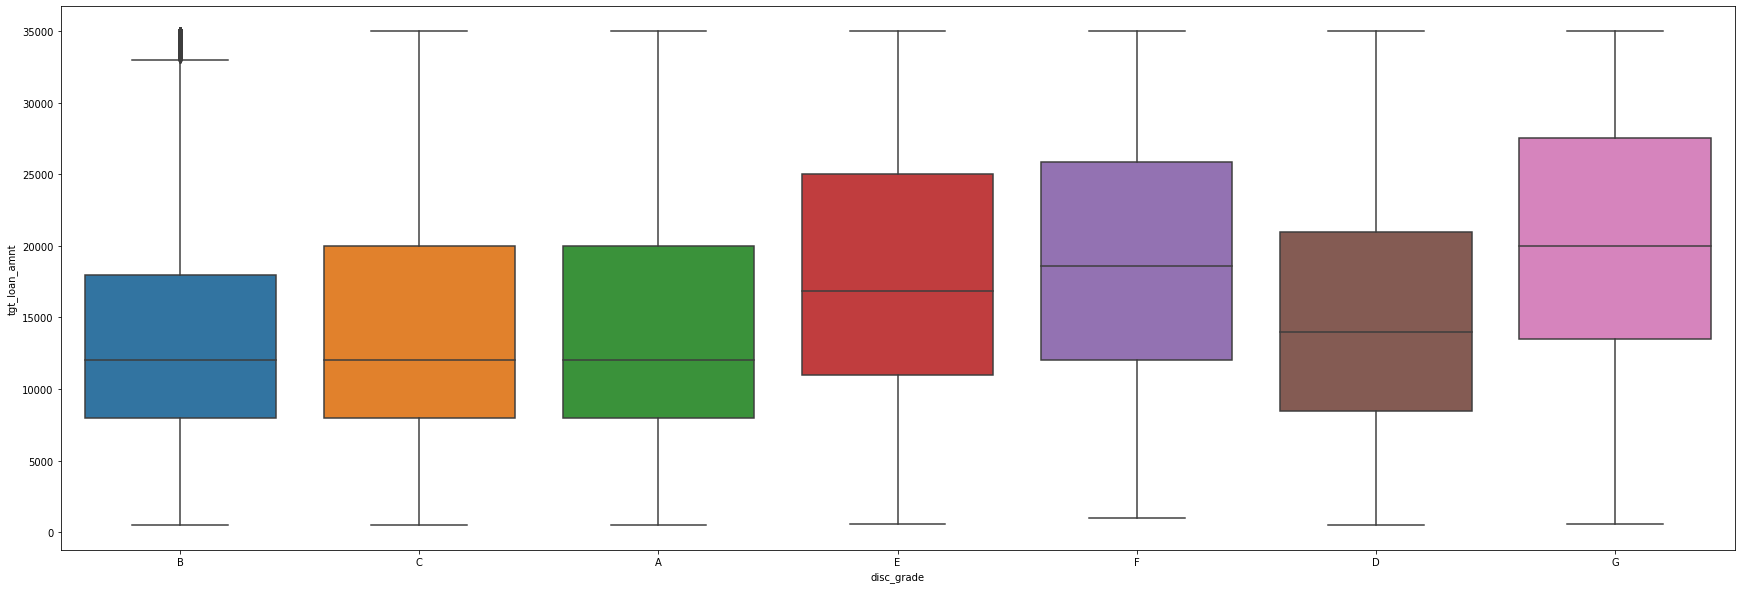

In [ ]:
#Comportamiento de Monto prestado con relacion al grado asignado al prestamo
data = pd.concat([df['tgt_loan_amnt'], df['disc_grade']], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x='disc_grade', y="tgt_loan_amnt", data=data)

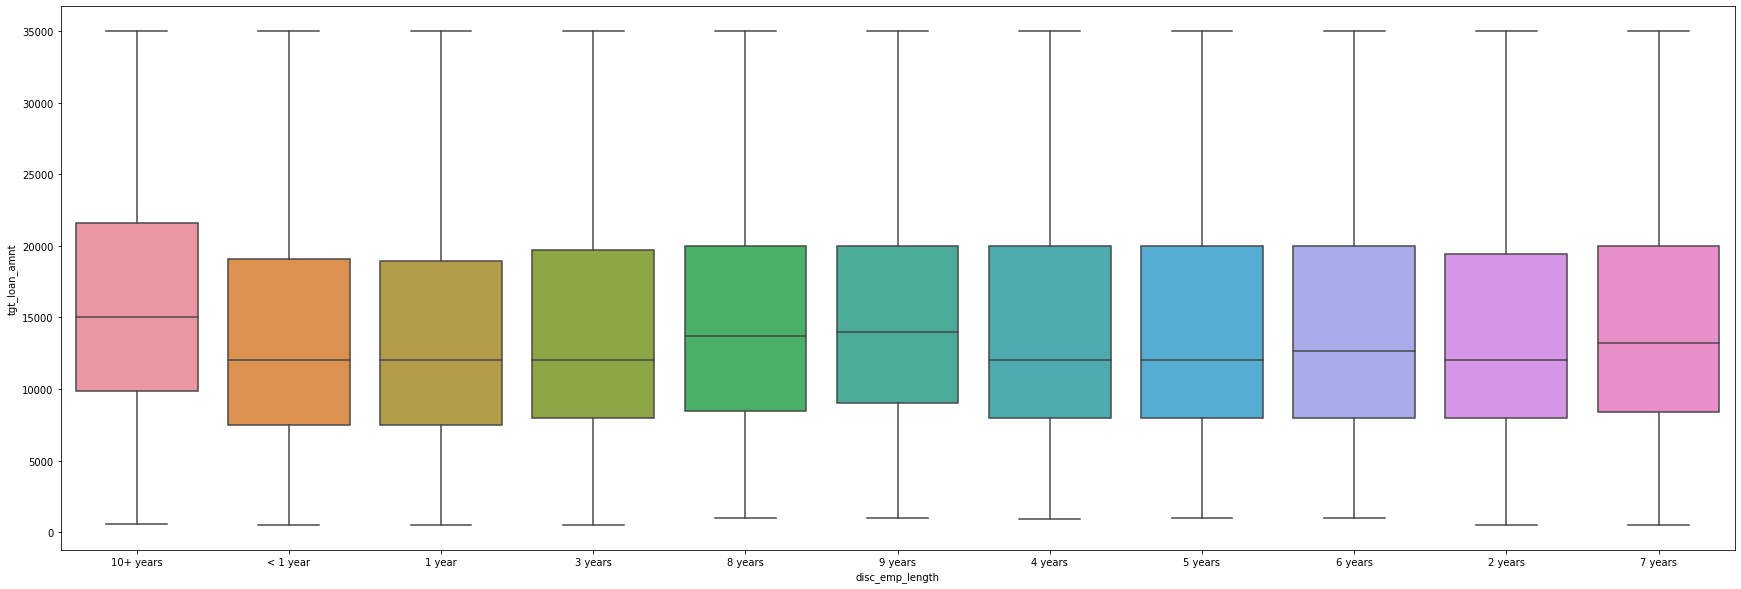

In [ ]:
#Comportamiento de Monto prestado con relacion al tiempo en el trabajo
data = pd.concat([df['tgt_loan_amnt'], df['disc_emp_length']], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x='disc_emp_length', y="tgt_loan_amnt", data=data)

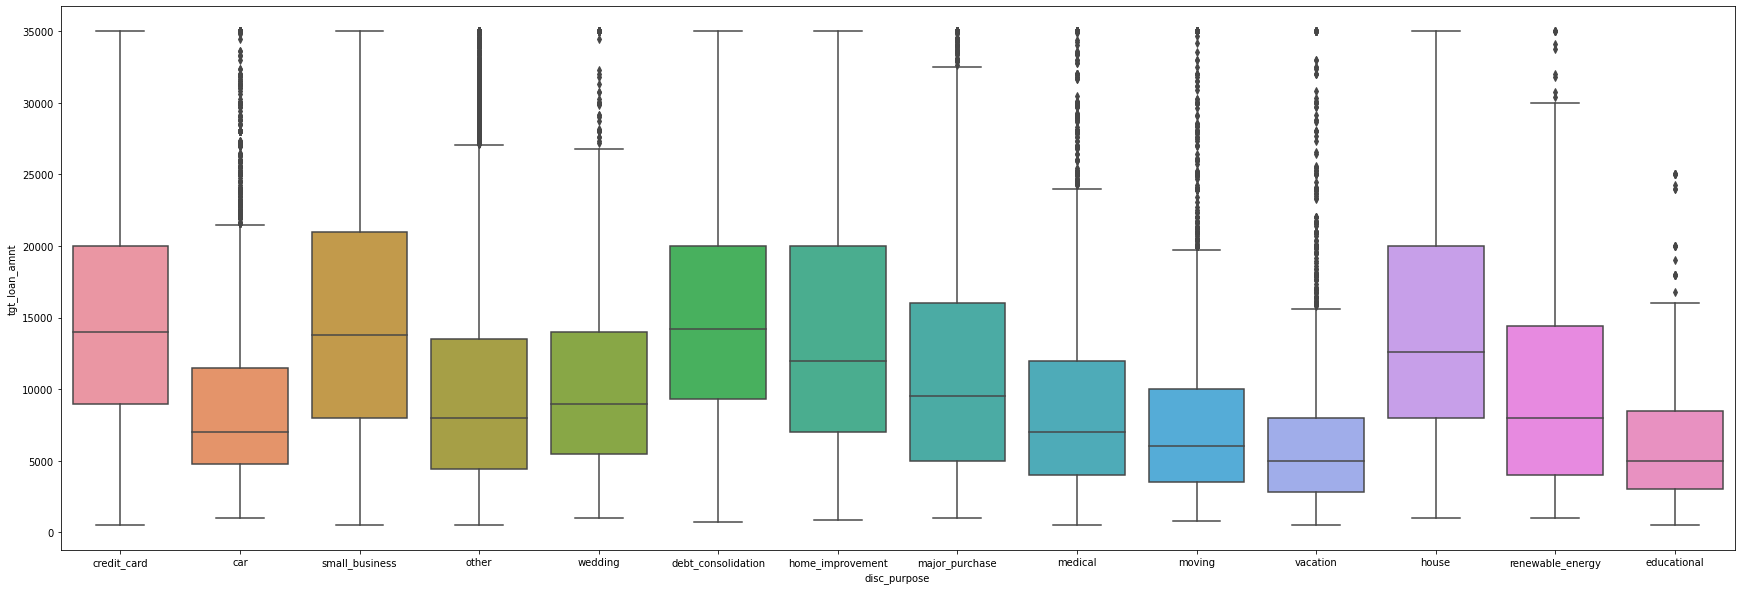

In [ ]:
#Comportamiento de Monto prestado con relacion al tipo de uso para el prestamo
data = pd.concat([df['tgt_loan_amnt'], df['disc_purpose']], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x='disc_purpose', y="tgt_loan_amnt", data=data)

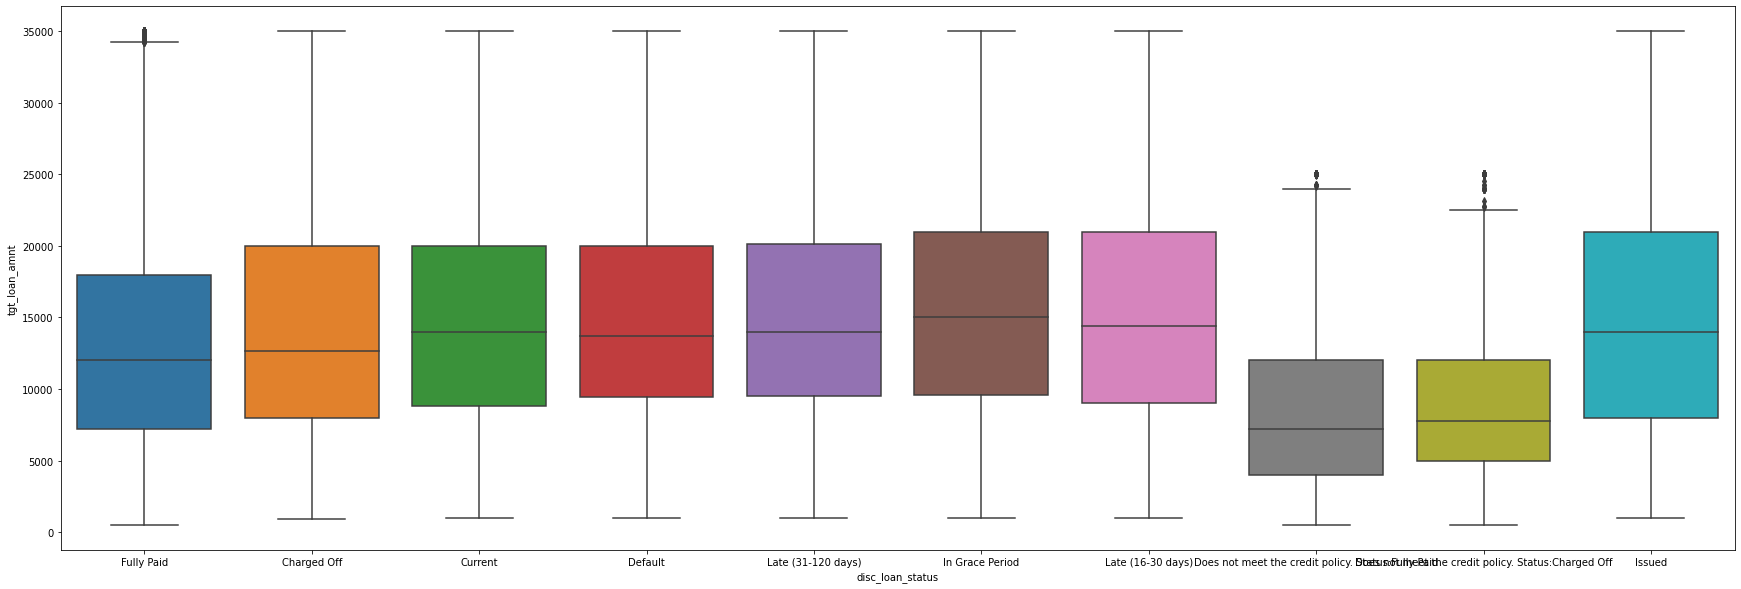

In [ ]:
#Comportamiento de Monto prestado con relacion al estatus del prestamo
data = pd.concat([df['tgt_loan_amnt'], df['disc_loan_status']], axis=1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x='disc_loan_status', y="tgt_loan_amnt", data=data)

In [ ]:
#Revisar la correlacion de cada variable con la variable objetivo
corr = df.corr()
corr[['tgt_loan_amnt']].sort_values(by = 'tgt_loan_amnt',ascending = False).style.background_gradient()

,tgt_loan_amnt
tgt_loan_amnt,1.000000
cont_funded_amnt,0.999263
cont_funded_amnt_inv,0.997115
cont_installment,0.944977
cont_out_prncp_inv,0.646898
cont_out_prncp,0.646897
cont_total_rec_int,0.533916
cont_total_pymnt_inv,0.475655
cont_total_pymnt,0.474626
cont_annual_inc_joint,0.438866


In [ ]:
#Eliminar las variables cuya completitud sea menor al 80%
null_cols=list(completitud[completitud["completitud"]<80]["columna"].values)
df=df.drop(columns=null_cols)

In [ ]:
#VErificamo que solo hayan variables con completitud mayor o igual al 80%
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,cont_total_rev_hi_lim,70276,92.080498
1,cont_tot_coll_amt,70276,92.080498
2,cont_tot_cur_bal,70276,92.080498
3,disc_emp_title,51462,94.200674
4,disc_emp_length,44825,94.948607
5,disc_last_pymnt_d,17659,98.009982
6,cont_revol_util,502,99.943429
7,disc_title,152,99.982871
8,disc_collections_12_mths_ex_med,145,99.983660
9,disc_last_credit_pull_d,53,99.994027


## Parte 2
* Elimina los datos faltantes o duplicados con el método que sea más conveniente y justifica tu elección.

* Elimina las variables cuyo valor de completitud sea menor a 80; después, identifica y modifica aquellos valores atípicos (_outliers_).

In [ ]:
from pandas.core.algorithms import isin
#Para poder asignar valores, a los valores faltantes, se utilizara una tecnica de imputacion
imputar=(list(completitud[completitud["completitud"]!= 100]["columna"].values))

In [ ]:
#se filtra solo las variables discretas para imputarlas por aparta de las continuas
string = imputar
substr = ['disc_']
imputarDisc=[]
for i in substr:
    for j in string:
        if(j.find(i)!=-1 and j not in imputarDisc):
            imputarDisc.append(j)
imputarDisc

['disc_emp_title',
 'disc_emp_length',
 'disc_last_pymnt_d',
 'disc_title',
 'disc_collections_12_mths_ex_med',
 'disc_last_credit_pull_d',
 'disc_acc_now_delinq',
 'disc_total_acc',
 'disc_pub_rec',
 'disc_open_acc',
 'disc_inq_last_6mths',
 'disc_delinq_2yrs',
 'disc_earliest_cr_line']

In [ ]:
#se filtra solo las variables continuas para imputarlas por aparta de las descretas
string = imputar
substr = ['cont_']
imputarCont=[]
for i in substr:
    for j in string:
        if(j.find(i)!=-1 and j not in imputarCont):
            imputarCont.append(j)
imputarCont

['cont_total_rev_hi_lim',
 'cont_tot_coll_amt',
 'cont_tot_cur_bal',
 'cont_revol_util',
 'cont_annual_inc']

In [ ]:
#Se imputaran las variables discretas con la estrategia de la moda o mas frecuenta, ya que estas no tienen forma de asignarle una media o mediana
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp.fit(df[imputarDisc])

SimpleImputer(strategy='most_frequent')

In [ ]:
#Se imputara las variables continuas con el la estrategia promedio, para no afectar el promedio de los datos y mantener las variables estadisticas lo mas parecido posible
imp2=SimpleImputer(missing_values=np.nan,strategy="mean")
imp2.fit(df[imputarCont])

SimpleImputer()

In [ ]:
df[imputarDisc]=imp.transform(df[imputarDisc])
df[imputarCont]=imp2.transform(df[imputarCont])

In [ ]:
#Aseguramos que no tenemos variables con valores faltantes
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total,completitud
0,disc_id,0,100.0
1,disc_pub_rec,0,100.0
2,cont_revol_bal,0,100.0
3,cont_revol_util,0,100.0
4,disc_total_acc,0,100.0
5,disc_initial_list_status,0,100.0
6,cont_out_prncp,0,100.0
7,cont_out_prncp_inv,0,100.0
8,cont_total_pymnt,0,100.0
9,cont_total_pymnt_inv,0,100.0


In [ ]:
#Revisamos que todas las variables contables son de tipo flotante
df.filter(like='cont_').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   cont_funded_amnt              887379 non-null  float64
 1   cont_funded_amnt_inv          887379 non-null  float64
 2   cont_int_rate                 887379 non-null  float64
 3   cont_installment              887379 non-null  float64
 4   cont_annual_inc               887379 non-null  float64
 5   cont_dti                      887379 non-null  float64
 6   cont_revol_bal                887379 non-null  float64
 7   cont_revol_util               887379 non-null  float64
 8   cont_out_prncp                887379 non-null  float64
 9   cont_out_prncp_inv            887379 non-null  float64
 10  cont_total_pymnt              887379 non-null  float64
 11  cont_total_pymnt_inv          887379 non-null  float64
 12  cont_total_rec_prncp          887379 non-nul

In [ ]:
# Función outliers
def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)
    
        
        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)
        
        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)
    
        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)
        
        #MEAN CHANGE
        
        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el máximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
        #9Si el cambio entre el percentil 9 y el máximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)
        
        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))
        
    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
       'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
       'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results
def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)
    
    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index

In [ ]:
#Se identificaran los outliers de cada variable
outliers=OUTLIERS(df,list(df.filter(like="cont_")))
outliers

,features,n_outliers_IQR,n_outliers_Percentil,n_outliers_Mean_Change,n_outliers_IQR_%,n_outliers_Percentil_%,n_outliers_Mean_Change_%,total_outliers,%_outliers,indices
0,cont_funded_amnt,0,86107,26,0.00,9.70,0.00,26,0.00,"[39442, 38932, 38936, 42136, 39331, 39466, 422..."
1,cont_funded_amnt_inv,0,84100,478,0.00,9.48,0.05,478,0.05,"[41422, 41423, 41424, 41425, 41426, 41427, 414..."
2,cont_int_rate,6308,83192,112,0.71,9.38,0.01,6308,0.71,"[327680, 753667, 327684, 819204, 557063, 32769..."
3,cont_installment,23149,88608,80,2.61,9.99,0.01,23227,2.62,"[524291, 393233, 655380, 131102, 655398, 52432..."
4,cont_annual_inc,39719,84768,1,4.48,9.55,0.00,39719,4.48,"[524292, 655374, 524306, 655380, 262167, 39324..."
5,cont_dti,81,88687,2,0.01,9.99,0.00,81,0.01,"[524288, 542724, 541704, 519691, 555531, 48590..."
6,cont_revol_bal,48649,88734,1,5.48,10.00,0.00,44367,5.00,"[524289, 524292, 786437, 393237, 262167, 65538..."
7,cont_revol_util,51,88222,1,0.01,9.94,0.00,51,0.01,"[811008, 487938, 404996, 808709, 283910, 49127..."
8,cont_out_prncp,3363,44354,1,0.38,5.00,0.00,3363,0.38,"[499714, 466949, 540678, 483338, 507917, 46695..."
9,cont_out_prncp_inv,3311,44368,1,0.37,5.00,0.00,3311,0.37,"[499714, 466949, 540678, 483338, 507917, 46695..."


In [ ]:
#Se buscara el numero de outliers
indices=list(outliers["indices"].values)
indices=list(set(reduce(lambda x,y: x+y, indices)))
len(indices)

259616

In [ ]:
#Porcentaje del total de outliers
(len(indices)/df.shape[0])*100

29.256495815204104

In [ ]:
#SE eliminaran los outliers del DataFrame
df=df[~df.index.isin(indices)].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627763 entries, 0 to 627762
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   disc_id                          627763 non-null  int64  
 1   disc_member_id                   627763 non-null  int64  
 2   tgt_loan_amnt                    627763 non-null  float64
 3   cont_funded_amnt                 627763 non-null  float64
 4   cont_funded_amnt_inv             627763 non-null  float64
 5   disc_term                        627763 non-null  object 
 6   cont_int_rate                    627763 non-null  float64
 7   cont_installment                 627763 non-null  float64
 8   disc_grade                       627763 non-null  object 
 9   disc_sub_grade                   627763 non-null  object 
 10  disc_emp_title                   627763 non-null  object 
 11  disc_emp_length                  627763 non-null  object 
 12  di

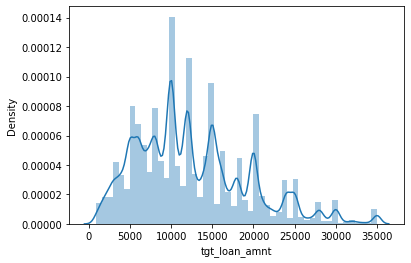

In [ ]:
#Ahora se volvera a tomar las graficas hechas en el proceso exploratorio, para poder ver, graficamente, los cambio hechos
#se comprueba en una grafica de distribucion
sns.distplot(df['tgt_loan_amnt']);

Comparacion con el mismo grafico, hecha en el proceso exploratorio
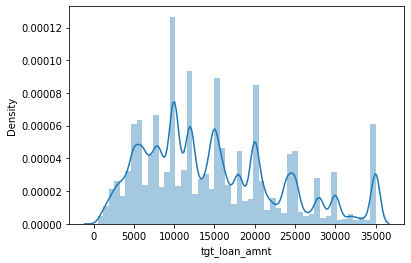

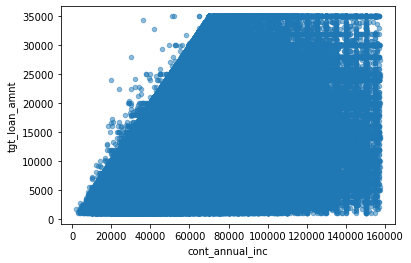

In [ ]:
#Relacion entre el Prestamo solicitado (tgt_loan_amnt) y los incresos anuales (cont_annual_inc) 
datos = pd.concat([df['tgt_loan_amnt'], df['cont_annual_inc']], axis=1)
datos.plot.scatter(x='cont_annual_inc', y='tgt_loan_amnt', alpha = 0.5);

Comparacion con el mismo grafico, hecha en el proceso exploratorio
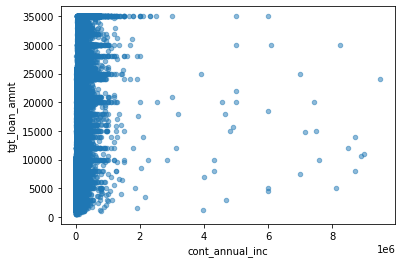

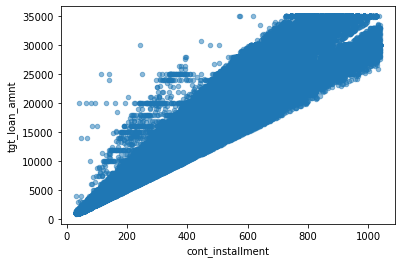

In [ ]:
#Relacion entre el Prestamo solicitado (tgt_loan_amnt) y las cuotas mensuales (cont_installment) 
datos = pd.concat([df['tgt_loan_amnt'], df['cont_installment']], axis=1)
datos.plot.scatter(x='cont_installment', y='tgt_loan_amnt', alpha = 0.5);

Comparacion con el mismo grafico, hecha en el proceso exploratorio
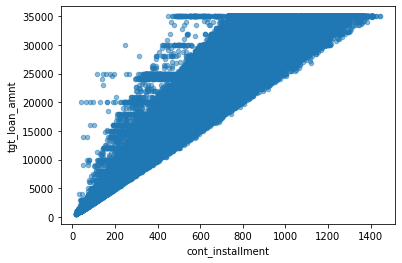

# **Al eliminar outliers, se notan los datos menos dispersos en las graficas, en comparacion a las graficas hechas en el proceso exploratorio.**
**Esto se puede apreciar mucho mejor en el rango de los ejes**

## Parte 3
Usa un transformador o los transformadores necesarios y justifica tu elección.

In [ ]:
#Se realizara un escalado con el escalador StandardScaler, ya que queremos, en los datos, que cada variable su varianza sea de 1
escalador = StandardScaler()

In [ ]:
#Se hace un describe para poder comparar, mas adelante, el cambio de las variables
df.describe()

,disc_id,disc_member_id,tgt_loan_amnt,cont_funded_amnt,cont_funded_amnt_inv,cont_int_rate,cont_installment,cont_annual_inc,cont_dti,cont_revol_bal,cont_revol_util,cont_out_prncp,cont_out_prncp_inv,cont_total_pymnt,cont_total_pymnt_inv,cont_total_rec_prncp,cont_total_rec_int,cont_total_rec_late_fee,cont_recoveries,cont_collection_recovery_fee,cont_last_pymnt_amnt,disc_policy_code,cont_tot_coll_amt,cont_tot_cur_bal,cont_total_rev_hi_lim
count,6.277630e+05,6.277630e+05,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.000000,627763.0,627763.0,627763.0,627763.000000,627763.0,627763.000000,627763.000000,627763.000000
mean,3.423709e+07,3.687152e+07,12482.635445,12473.683022,12446.497253,12.853049,371.644238,62626.127175,18.294034,12558.321762,54.658492,7932.750265,7929.499826,5562.365173,5536.153368,4278.782620,1283.582555,0.0,0.0,0.0,1264.553499,1.0,36.530056,107960.092981,25292.042567
std,2.261083e+07,2.388020e+07,6813.610190,6810.348095,6819.930678,4.028912,188.706445,27538.100307,8.368781,8868.792965,23.491822,7464.804062,7461.658583,4984.598642,4962.917772,4276.735094,1186.961563,0.0,0.0,0.0,2418.398338,0.0,92.168630,99022.681584,15373.135111
min,5.574200e+04,7.047300e+04,900.000000,900.000000,350.000000,5.320000,30.120000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000
25%,1.128622e+07,1.294732e+07,7200.000000,7200.000000,7200.000000,9.990000,237.130000,42000.000000,12.010000,5914.000000,37.600000,625.405000,625.165000,1630.590000,1621.450000,1051.985000,387.015000,0.0,0.0,0.0,258.670000,1.0,0.000000,27293.000000,13400.000000
50%,3.844871e+07,4.123187e+07,11400.000000,11400.000000,11325.000000,12.690000,337.810000,58000.000000,17.810000,10449.000000,55.300000,6512.500000,6511.200000,4050.470000,4032.200000,2710.300000,919.960000,0.0,0.0,0.0,392.810000,1.0,0.000000,70713.000000,22500.000000
75%,5.555461e+07,5.915589e+07,16000.000000,16000.000000,16000.000000,15.610000,483.940000,78400.000000,24.170000,17088.000000,72.600000,12530.700000,12522.690000,8205.430000,8162.185000,6124.990000,1825.440000,0.0,0.0,0.0,651.820000,1.0,0.000000,159143.000000,32068.620045
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,25.280000,1040.440000,157500.000000,41.940000,43897.000000,127.300000,34145.160000,34129.780000,24003.620000,23939.970000,20000.000000,5891.480000,0.0,0.0,0.0,12932.720000,1.0,560.000000,441111.000000,80300.000000


In [ ]:
#Se filtran las variables discretas como lista y se removeran las que no se hara transformada ya que no afectan en nada dentro del modelo
disc = list(df.filter(like="disc_"))
remove = ['disc_id', 'disc_member_id', 'disc_issue_d', 'disc_url', 'disc_zip_code', 'disc_earliest_cr_line', 'disc_last_pymnt_d', 'disc_last_credit_pull_d']
for x in remove:
  disc.remove(x)
disc

['disc_term',
 'disc_grade',
 'disc_sub_grade',
 'disc_emp_title',
 'disc_emp_length',
 'disc_home_ownership',
 'disc_verification_status',
 'disc_loan_status',
 'disc_pymnt_plan',
 'disc_purpose',
 'disc_title',
 'disc_addr_state',
 'disc_delinq_2yrs',
 'disc_inq_last_6mths',
 'disc_open_acc',
 'disc_pub_rec',
 'disc_total_acc',
 'disc_initial_list_status',
 'disc_collections_12_mths_ex_med',
 'disc_policy_code',
 'disc_application_type',
 'disc_acc_now_delinq']

In [ ]:
#Se hara el transformado de las variables discretas con la tecnica LabelEncoder, con el objetivo que no queden muchas columnas dentro del modelo, a comparacion de OneHotEncoder
transformador = LabelEncoder()
df[disc] = df[disc].apply(transformador.fit_transform)
#Luego, para que todos los datos esten en las mismas dimensiones, se escala con el escalador StandarScaler
transformado3 = escalador.fit_transform(df[disc])
transformado3 = pd.DataFrame(transformado3)
transformado3.columns = df[disc].columns
df_remove = df[remove]
transformado3.describe()


,disc_term,disc_grade,disc_sub_grade,disc_emp_title,disc_emp_length,disc_home_ownership,disc_verification_status,disc_loan_status,disc_pymnt_plan,disc_purpose,disc_title,disc_addr_state,disc_delinq_2yrs,disc_inq_last_6mths,disc_open_acc,disc_pub_rec,disc_total_acc,disc_initial_list_status,disc_collections_12_mths_ex_med,disc_policy_code,disc_application_type,disc_acc_now_delinq
count,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,627763.0,6.277630e+05,6.277630e+05
mean,2.752695e-17,1.412567e-17,1.019584e-16,3.033397e-17,-1.824566e-17,1.186647e-16,-2.707420e-17,1.293042e-16,-6.593111e-19,-1.403512e-17,-3.839285e-17,7.755536e-17,-2.397289e-17,-5.025479e-18,1.518510e-16,3.739681e-17,3.966054e-17,6.519540e-17,-2.822870e-17,0.0,9.394476e-18,1.967181e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00,1.000001e+00
min,-5.839876e-01,-1.393915e+00,-1.741704e+00,-1.862524e+00,-1.124818e+00,-1.607759e+00,-1.186153e+00,-1.049575e+00,-1.784916e-03,-1.119019e+00,-1.820602e+00,-1.536224e+00,-3.585666e-01,-6.809115e-01,-2.197152e+00,-3.700343e-01,-2.018351e+00,-9.983018e-01,-1.021256e-01,0.0,-2.157221e-02,-6.257518e-02
25%,-5.839876e-01,-5.710101e-01,-7.396094e-01,-8.841065e-01,-8.104189e-01,-1.087328e+00,-1.186153e+00,-5.370446e-01,-1.784916e-03,-6.820730e-01,-6.271351e-01,-9.399437e-01,-3.585666e-01,-6.809115e-01,-7.999643e-01,-3.700343e-01,-6.942718e-01,-9.983018e-01,-1.021256e-01,0.0,-2.157221e-02,-6.257518e-02
50%,-5.839876e-01,2.518948e-01,-7.154620e-02,1.289212e-01,-4.960199e-01,4.739639e-01,8.318302e-02,-5.370446e-01,-1.784916e-03,-2.451272e-01,-3.185575e-01,-1.239628e-02,-3.585666e-01,-6.809115e-01,-2.011698e-01,-3.700343e-01,-1.646400e-01,-9.983018e-01,-1.021256e-01,0.0,-2.157221e-02,-6.257518e-02
75%,1.712365e+00,2.518948e-01,5.965170e-01,8.231286e-01,7.615760e-01,9.943946e-01,1.352519e+00,-5.370446e-01,-1.784916e-03,-2.451272e-01,-3.185575e-01,7.826444e-01,-3.585666e-01,3.703028e-01,5.972229e-01,-3.700343e-01,5.415357e-01,1.001701e+00,-1.021256e-01,0.0,-2.157221e-02,-6.257518e-02
max,1.712365e+00,3.543514e+00,3.936833e+00,1.662584e+00,2.019172e+00,9.943946e-01,1.352519e+00,3.563203e+00,5.602504e+02,4.561276e+00,3.951800e+00,1.776445e+00,2.853620e+01,2.244580e+01,9.379543e+00,4.586574e+01,8.750829e+00,1.001701e+00,6.816425e+01,0.0,4.635594e+01,9.482240e+01


In [ ]:
#Se filtrara los datos por cada tipo de variable
df_cont = df.filter(like='cont_')
df_tgt = df.filter(like= 'tgt_')
#Se hace el transformado de las variables contables
transformado1 = escalador.fit_transform(df_cont)
transformado1 = pd.DataFrame(transformado1)
transformado1.columns = df_cont.columns
transformado1.describe()

,cont_funded_amnt,cont_funded_amnt_inv,cont_int_rate,cont_installment,cont_annual_inc,cont_dti,cont_revol_bal,cont_revol_util,cont_out_prncp,cont_out_prncp_inv,cont_total_pymnt,cont_total_pymnt_inv,cont_total_rec_prncp,cont_total_rec_int,cont_total_rec_late_fee,cont_recoveries,cont_collection_recovery_fee,cont_last_pymnt_amnt,cont_tot_coll_amt,cont_tot_cur_bal,cont_total_rev_hi_lim
count,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,627763.0,627763.0,627763.0,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05
mean,-1.937752e-17,-1.839959e-16,1.558917e-15,4.913198e-16,-4.803181e-16,3.794010e-16,-9.548410e-17,-7.010770e-17,1.064858e-16,-3.078672e-16,3.694406e-17,-2.625020e-16,2.510023e-16,2.238375e-16,0.0,0.0,0.0,-1.617208e-16,-1.332884e-16,4.473129e-17,2.925870e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,0.0,0.0,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.699427e+00,-1.773699e+00,-1.869749e+00,-1.809819e+00,-2.205315e+00,-2.185987e+00,-1.416014e+00,-2.326705e+00,-1.062688e+00,-1.062700e+00,-1.115911e+00,-1.115505e+00,-1.000480e+00,-1.081403e+00,0.0,0.0,0.0,-5.228893e-01,-3.963397e-01,-1.090257e+00,-1.645212e+00
25%,-7.743638e-01,-7.692896e-01,-7.106264e-01,-7.128233e-01,-7.490039e-01,-7.508906e-01,-7.491805e-01,-7.261466e-01,-9.789073e-01,-9.789165e-01,-7.887853e-01,-7.887913e-01,-7.545008e-01,-7.553473e-01,0.0,0.0,0.0,-4.159300e-01,-3.963397e-01,-8.146331e-01,-7.735606e-01
50%,-1.576548e-01,-1.644442e-01,-4.046973e-02,-1.792958e-01,-1.679902e-01,-5.783808e-02,-2.378366e-01,2.730773e-02,-1.902597e-01,-1.900785e-01,-3.033136e-01,-3.030384e-01,-3.667480e-01,-3.063476e-01,0.0,0.0,0.0,-3.604634e-01,-3.963397e-01,-3.761474e-01,-1.816184e-01
75%,5.177885e-01,5.210472e-01,6.842923e-01,5.950822e-01,5.728022e-01,7.021299e-01,5.107439e-01,7.637348e-01,6.159510e-01,6.155728e-01,5.302467e-01,5.291310e-01,4.316865e-01,4.565084e-01,0.0,0.0,0.0,-2.533635e-01,-3.963397e-01,5.168811e-01,4.408068e-01
max,3.307663e+00,3.307001e+00,3.084446e+00,3.544109e+00,3.445189e+00,2.825499e+00,3.533593e+00,3.092207e+00,3.511469e+00,3.511324e+00,3.699650e+00,3.708268e+00,3.675989e+00,3.882098e+00,0.0,0.0,0.0,4.824753e+00,5.679485e+00,3.364393e+00,3.578190e+00


In [ ]:
#Se hace el transformado de la variable objetivo
transformado2 = escalador.fit_transform(df_tgt)
transformado2 = pd.DataFrame(transformado2)
transformado2.columns = df_tgt.columns
transformado2.describe()

,tgt_loan_amnt
count,6.277630e+05
mean,-1.062142e-16
std,1.000001e+00
min,-1.699928e+00
25%,-7.753070e-01
50%,-1.588932e-01
75%,5.162267e-01
max,3.304765e+00


In [ ]:
#Se juntaran, en otro DataFrame, todas las variables transformadas y no se tendrán en cuenta las que se eliminaron anteriormente
df1 = transformado1.join(transformado2)
df1 = df1.join(transformado3)
df1.describe()

,cont_funded_amnt,cont_funded_amnt_inv,cont_int_rate,cont_installment,cont_annual_inc,cont_dti,cont_revol_bal,cont_revol_util,cont_out_prncp,cont_out_prncp_inv,cont_total_pymnt,cont_total_pymnt_inv,cont_total_rec_prncp,cont_total_rec_int,cont_total_rec_late_fee,cont_recoveries,cont_collection_recovery_fee,cont_last_pymnt_amnt,cont_tot_coll_amt,cont_tot_cur_bal,cont_total_rev_hi_lim,tgt_loan_amnt,disc_term,disc_grade,disc_sub_grade,disc_emp_title,disc_emp_length,disc_home_ownership,disc_verification_status,disc_loan_status,disc_pymnt_plan,disc_purpose,disc_title,disc_addr_state,disc_delinq_2yrs,disc_inq_last_6mths,disc_open_acc,disc_pub_rec,disc_total_acc,disc_initial_list_status,disc_collections_12_mths_ex_med,disc_policy_code,disc_application_type,disc_acc_now_delinq
count,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,627763.0,627763.0,627763.0,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,6.277630e+05,627763.0,6.277630e+05,6.277630e+05
mean,-1.937752e-17,-1.839959e-16,1.558917e-15,4.913198e-16,-4.803181e-16,3.794010e-16,-9.548410e-17,-7.010770e-17,1.064858e-16,-3.078672e-16,3.694406e-17,-2.625020e-16,2.510023e-16,2.238375e-16,0.0,0.0,0.0,-1.617208e-16,-1.332884e-16,4.473129e-17,2.925870e-17,-1.062142e-16,2.752695e-17,1.412567e-17,1.019584e-16,3.033397e-17,-1.824566e-17,1.186647e-16,-2.707420e-17,1.293042e-16,-6.593111e-19,-1.403512e-17,-3.839285e-17,7.755536e-17,-2.397289e-17,-5.025479e-18,1.518510e-16,3.739681e-17,3.966054e-17,6.519540e-17,-2.822870e-17,0.0,9.394476e-18,1.967181e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,0.0,0.0,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00,1.000001e+00
min,-1.699427e+00,-1.773699e+00,-1.869749e+00,-1.809819e+00,-2.205315e+00,-2.185987e+00,-1.416014e+00,-2.326705e+00,-1.062688e+00,-1.062700e+00,-1.115911e+00,-1.115505e+00,-1.000480e+00,-1.081403e+00,0.0,0.0,0.0,-5.228893e-01,-3.963397e-01,-1.090257e+00,-1.645212e+00,-1.699928e+00,-5.839876e-01,-1.393915e+00,-1.741704e+00,-1.862524e+00,-1.124818e+00,-1.607759e+00,-1.186153e+00,-1.049575e+00,-1.784916e-03,-1.119019e+00,-1.820602e+00,-1.536224e+00,-3.585666e-01,-6.809115e-01,-2.197152e+00,-3.700343e-01,-2.018351e+00,-9.983018e-01,-1.021256e-01,0.0,-2.157221e-02,-6.257518e-02
25%,-7.743638e-01,-7.692896e-01,-7.106264e-01,-7.128233e-01,-7.490039e-01,-7.508906e-01,-7.491805e-01,-7.261466e-01,-9.789073e-01,-9.789165e-01,-7.887853e-01,-7.887913e-01,-7.545008e-01,-7.553473e-01,0.0,0.0,0.0,-4.159300e-01,-3.963397e-01,-8.146331e-01,-7.735606e-01,-7.753070e-01,-5.839876e-01,-5.710101e-01,-7.396094e-01,-8.841065e-01,-8.104189e-01,-1.087328e+00,-1.186153e+00,-5.370446e-01,-1.784916e-03,-6.820730e-01,-6.271351e-01,-9.399437e-01,-3.585666e-01,-6.809115e-01,-7.999643e-01,-3.700343e-01,-6.942718e-01,-9.983018e-01,-1.021256e-01,0.0,-2.157221e-02,-6.257518e-02
50%,-1.576548e-01,-1.644442e-01,-4.046973e-02,-1.792958e-01,-1.679902e-01,-5.783808e-02,-2.378366e-01,2.730773e-02,-1.902597e-01,-1.900785e-01,-3.033136e-01,-3.030384e-01,-3.667480e-01,-3.063476e-01,0.0,0.0,0.0,-3.604634e-01,-3.963397e-01,-3.761474e-01,-1.816184e-01,-1.588932e-01,-5.839876e-01,2.518948e-01,-7.154620e-02,1.289212e-01,-4.960199e-01,4.739639e-01,8.318302e-02,-5.370446e-01,-1.784916e-

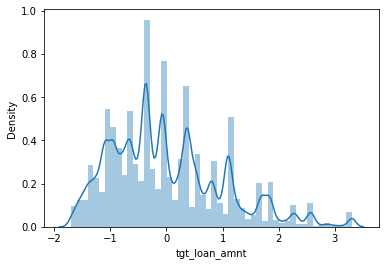

In [ ]:
#Ahora se volvera a tomar las graficas hechas en el proceso de limpieza de datos, para poder ver, graficamente, los cambio hechos
#se comprueba en una grafica de distribucion
sns.distplot(df1['tgt_loan_amnt']);

Comparacion con el mismo grafico, hecha en el proceso de limpieza de datos
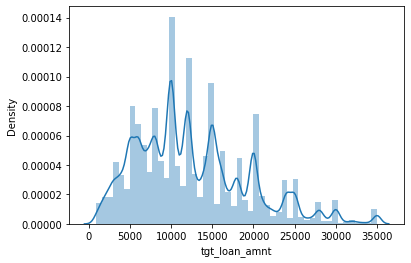

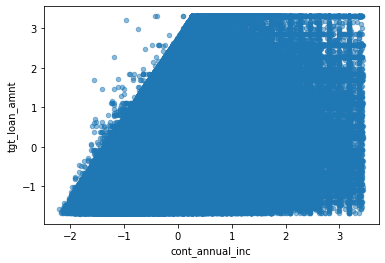

In [ ]:
#Relacion entre el Prestamo solicitado (tgt_loan_amnt) y los incresos anuales (cont_annual_inc) 
datos = pd.concat([df1['tgt_loan_amnt'], df1['cont_annual_inc']], axis=1)
datos.plot.scatter(x='cont_annual_inc', y='tgt_loan_amnt', alpha = 0.5);

Comparacion con el mismo grafico, hecha en el proceso de limpieza de datos
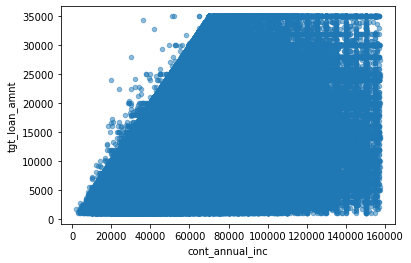

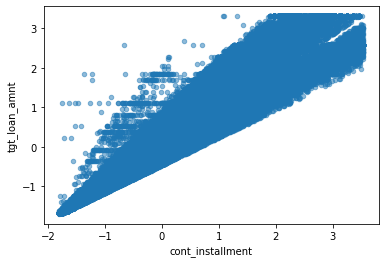

In [ ]:
#Relacion entre el Prestamo solicitado (tgt_loan_amnt) y las cuotas mensuales (cont_installment) 
datos = pd.concat([df1['tgt_loan_amnt'], df1['cont_installment']], axis=1)
datos.plot.scatter(x='cont_installment', y='tgt_loan_amnt', alpha = 0.5);

Comparacion con el mismo grafico, hecha en el proceso de limpieza de datos
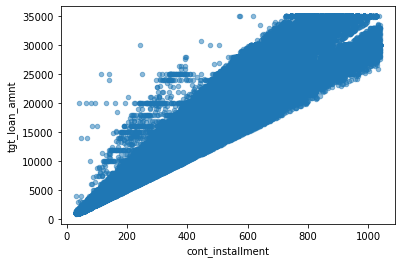

# **Al transformar las variables, vemos que las graficas tienen el mismo comprotamiento, en comparacion a las graficas hechas en el proceso de limpieza da datos, pero con valores reducidos, transformados.**
**Esto se puede apreciar mucho mejor en el rango de los ejes**

## Parte 4

Selecciona la mejor técnica para reducir las dimenciones y justifica por qué debe reducirse. Se recomienda indicar el número de dimensiones óptimo.

In [ ]:
#Se utilizara el metodo VarClusHi, ya que nos va ayudar a definir que datos, en cada cluster, nos va a servir mejor en la importacia de los datos.
#Se eliminara las variables que tienen varianza igual a 0
df1 = df1.drop(['cont_total_rec_late_fee','cont_recoveries','cont_collection_recovery_fee','disc_policy_code'], axis=1)

In [ ]:
#Al aumentar el valro de maxeigval2, que puede ir de 0 a 1, se generan mayores proyecciones sobre las dimensiones, provocando menos cantidad de clusteres y reduccion a mas
vc = VarClusHi(df1,maxeigval2=1)
vc

In [ ]:
vc.varclus()

In [ ]:
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,cont_funded_amnt,0.957159,0.194950,0.053215
1,0,cont_funded_amnt_inv,0.957323,0.193628,0.052925
2,0,cont_installment,0.793746,0.164320,0.246810
3,0,cont_out_prncp,0.811627,0.184743,0.231059
4,0,cont_out_prncp_inv,0.811630,0.184743,0.231057
5,0,tgt_loan_amnt,0.955574,0.195210,0.055202
6,0,disc_term,0.275509,0.156850,0.859267
7,1,cont_total_pymnt,0.988515,0.282787,0.016013
8,1,cont_total_pymnt_inv,0.986361,0.280056,0.018944
9,1,cont_total_rec_prncp,0.905551,0.373035,0.150645


In [ ]:
#Se tomaran los valores con menor RS Ratio en cada cluster, ya que son las variables que, al tener menor RS Ratio, son las que en teoria tienen mayor correlacion
#en su propio cluster y menor correlacion con el cluster siguiente.
df4 = vc.rsquare.sort_values(["Cluster","RS_Ratio"],ascending=True).drop_duplicates(subset=["Cluster"],keep="first")
df4

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
1,0,cont_funded_amnt_inv,0.957323,0.193628,0.052925
7,1,cont_total_pymnt,0.988515,0.282787,0.016013
13,2,disc_sub_grade,0.978900,0.086123,0.023089
16,3,disc_total_acc,0.836302,0.103895,0.182677
17,4,disc_purpose,0.728319,0.034224,0.281309
20,5,disc_loan_status,0.771960,0.132755,0.262948
22,6,cont_tot_cur_bal,0.764308,0.086320,0.257959
25,7,disc_acc_now_delinq,0.562777,0.000794,0.437570
27,8,cont_total_rev_hi_lim,0.830977,0.153985,0.199787
31,9,disc_initial_list_status,0.509843,0.060288,0.521604


Se paso de 39 variables a solo 13. Entre menos variables se tenga, mejor sera la forma en que podamos hacer el entrenamiento del modelo.


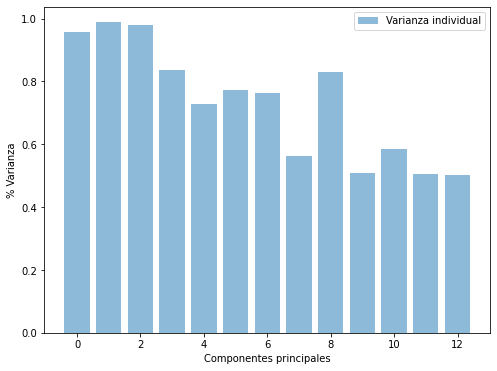

In [ ]:
#Muestra de los datos anteriores, de forma grafica. 
plt.figure(figsize=(8, 6))
plt.bar(df4['Cluster'], df4['RS_Own'], alpha=0.5, align='center', label="Varianza individual")
plt.legend()
plt.ylabel('% Varianza')
plt.xlabel('Componentes principales')
plt.show()